<a href="https://colab.research.google.com/github/hasmitha005/OIBSIP/blob/main/Project_5_Proposal_level_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Cell 1 - installs (fast) and imports
!pip install -q imbalanced-learn xgboost

import io, gzip
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from imblearn.over_sampling import SMOTE

import pickle
pd.set_option('display.max_columns', 60)
np.random.seed(42)


In [ ]:
# Step 1: Import necessary libraries
from google.colab import files
import pandas as pd
import io

# Step 2: Upload the CSV file
uploaded = files.upload()

# Step 3: Detect the uploaded file automatically (so no name issues)
filename = list(uploaded.keys())[0]
print(f"✅ Uploaded file detected: {filename}")

# Step 4: Read the CSV file
df = pd.read_csv(io.BytesIO(uploaded[filename]))

# Step 5: Display the first few rows
print("✅ File loaded successfully!")
print("Shape of dataset:", df.shape)
df.head()


Saving creditcard.csv to creditcard.csv
✅ Uploaded file detected: creditcard.csv
✅ File loaded successfully!
Shape of dataset: (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# Cell 3 - quick exploratory checks
print("Columns:", df.columns.tolist())
print("\nInfo:")
display(df.info())

print("\nClass distribution (counts):")
print(df['Class'].value_counts())

print("\nClass distribution (proportions):")
print(df['Class'].value_counts(normalize=True))

print("\nAmount & Time describe:")
display(df[['Time','Amount']].describe())

# show first few fraud cases
print("\nSample fraud rows:")
display(df[df['Class']==1].head(5))


Columns: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15    

None


Class distribution (counts):
Class
0    284315
1       492
Name: count, dtype: int64

Class distribution (proportions):
Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64

Amount & Time describe:


,Time,Amount
count,284807.000000,284807.000000
mean,94813.859575,88.349619
std,47488.145955,250.120109
min,0.000000,0.000000
25%,54201.500000,5.600000
50%,84692.000000,22.000000
75%,139320.500000,77.165000
max,172792.000000,25691.160000



Sample fraud rows:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [ ]:
# Cell 4 - scaling Time and Amount (V1..V28 are already PCA)
scaler_amount = StandardScaler()
scaler_time = StandardScaler()

df['scaled_amount'] = scaler_amount.fit_transform(df[['Amount']])
df['scaled_time']   = scaler_time.fit_transform(df[['Time']])

# Drop original Time & Amount (optional)
df_model = df.drop(['Time','Amount'], axis=1)

# Prepare X, y
X = df_model.drop('Class', axis=1)
y = df_model['Class']

print("X shape:", X.shape)
print("y distribution:\n", y.value_counts())


X shape: (284807, 30)
y distribution:
 Class
0    284315
1       492
Name: count, dtype: int64


In [ ]:
# Cell 5 - split and SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)
print("Train class counts before SMOTE:\n", y_train.value_counts())

# Apply SMOTE on training set only
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
print("After SMOTE, train class counts:\n", y_train_res.value_counts())


Train shape: (227845, 30) Test shape: (56962, 30)
Train class counts before SMOTE:
 Class
0    227451
1       394
Name: count, dtype: int64
After SMOTE, train class counts:
 Class
0    227451
1    227451
Name: count, dtype: int64


In [ ]:
# Cell 6 - train baseline models
# Logistic Regression (fast)
lr = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
lr.fit(X_train_res, y_train_res)

# Random Forest (reasonable defaults)
rf = RandomForestClassifier(n_estimators=100, max_depth=12, class_weight='balanced', random_state=42, n_jobs=-1)
rf.fit(X_train_res, y_train_res)

# Optional: XGBoost (uncomment if you installed xgboost and want to try)
# from xgboost import XGBClassifier
# xgb = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42, n_jobs=-1)
# xgb.fit(X_train_res, y_train_res)

print("Models trained.")


Models trained.


In [ ]:
# Cell 7 - evaluation function
def evaluate(model, X_test, y_test, name="Model"):
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:,1]
    elif hasattr(model, "decision_function"):
        y_proba = model.decision_function(X_test)
    else:
        y_proba = model.predict(X_test)
    y_pred = model.predict(X_test)
    print(f"\n=== {name} ===")
    print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification report:\n", classification_report(y_test, y_pred, digits=4))
    roc = roc_auc_score(y_test, y_proba)
    ap  = average_precision_score(y_test, y_proba)
    print(f"ROC AUC: {roc:.6f}")
    print(f"Average Precision (PR AUC): {ap:.6f}")
    return y_proba, roc, ap

proba_lr, roc_lr, ap_lr = evaluate(lr, X_test, y_test, "Logistic Regression")
proba_rf, roc_rf, ap_rf = evaluate(rf, X_test, y_test, "Random Forest")
# If using xgb:
# proba_xgb, roc_xgb, ap_xgb = evaluate(xgb, X_test, y_test, "XGBoost")



=== Logistic Regression ===
Confusion matrix:
 [[55406  1458]
 [    8    90]]

Classification report:
               precision    recall  f1-score   support

           0     0.9999    0.9744    0.9869     56864
           1     0.0581    0.9184    0.1094        98

    accuracy                         0.9743     56962
   macro avg     0.5290    0.9464    0.5481     56962
weighted avg     0.9982    0.9743    0.9854     56962

ROC AUC: 0.969848
Average Precision (PR AUC): 0.724861

=== Random Forest ===
Confusion matrix:
 [[56792    72]
 [   14    84]]

Classification report:
               precision    recall  f1-score   support

           0     0.9998    0.9987    0.9992     56864
           1     0.5385    0.8571    0.6614        98

    accuracy                         0.9985     56962
   macro avg     0.7691    0.9279    0.8303     56962
weighted avg     0.9990    0.9985    0.9987     56962

ROC AUC: 0.977940
Average Precision (PR AUC): 0.816291


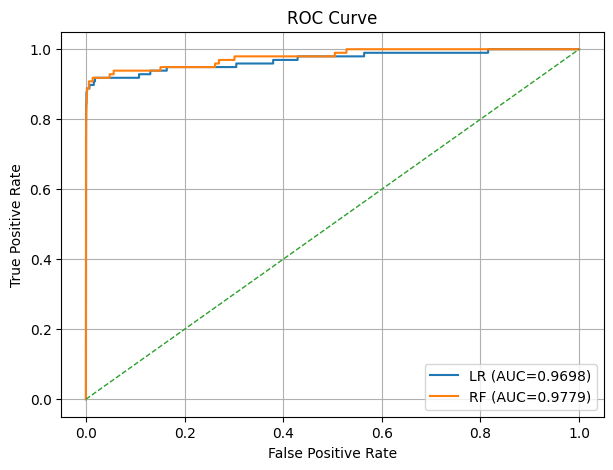

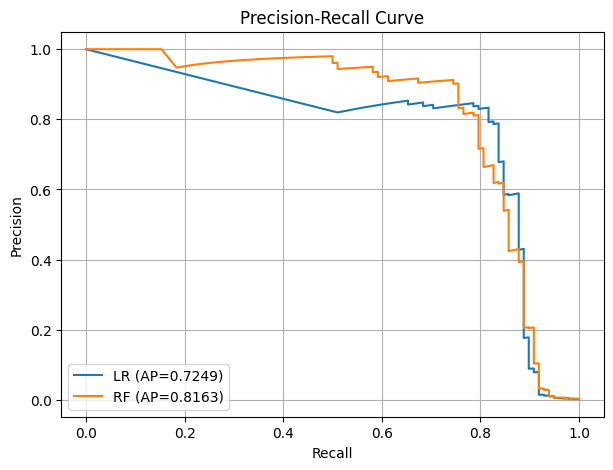

In [ ]:
# Cell 8 - plots
plt.figure(figsize=(7,5))
fpr_lr, tpr_lr, _ = roc_curve(y_test, proba_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, proba_rf)
plt.plot(fpr_lr, tpr_lr, label=f"LR (AUC={roc_lr:.4f})")
plt.plot(fpr_rf, tpr_rf, label=f"RF (AUC={roc_rf:.4f})")
plt.plot([0,1],[0,1],'--', linewidth=1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(7,5))
prec_lr, rec_lr, _ = precision_recall_curve(y_test, proba_lr)
prec_rf, rec_rf, _ = precision_recall_curve(y_test, proba_rf)
plt.plot(rec_lr, prec_lr, label=f"LR (AP={ap_lr:.4f})")
plt.plot(rec_rf, prec_rf, label=f"RF (AP={ap_rf:.4f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Cell 9 - threshold tuning example on Random Forest probabilities
from sklearn.metrics import precision_score, recall_score

probs = proba_rf
thresholds = [0.9, 0.7, 0.5, 0.3, 0.1]
print("Threshold  Precision  Recall")
for thr in thresholds:
    preds = (probs >= thr).astype(int)
    p = precision_score(y_test, preds, zero_division=0)
    r = recall_score(y_test, preds)
    print(f"{thr:.2f}     {p:.4f}      {r:.4f}")


Threshold  Precision  Recall
0.90     0.9012      0.7449
0.70     0.7117      0.8061
0.50     0.5385      0.8571
0.30     0.2358      0.8878
0.10     0.0370      0.9184
